In [3]:
import pandas as pd
import numpy as np
from dataset import TissueSegmentationDataset
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from model import HalfDualDecUNetPP
import torch.nn as nn
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [4]:
validation_data = TissueSegmentationDataset(
    pd.read_csv("dataset/val.csv")
)


def get_confmat(model_, data=validation_data, title=""):
    class_names = [
        "tissue_white_background",
        "tissue_stroma",
        "tissue_blood_vessel",	
        "tissue_tumor",
        "tissue_epidermis",
        "tissue_necrosis"
    ]

    num_classes = 6
    ignore_index = 10

    confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.float64)
    validation_loader = DataLoader(data, 32)
    model = HalfDualDec()
    model.load_state_dict(torch.load(os.path.join(path, model_)))

    model = nn.Sequential(model, nn.Sigmoid())
    model_ = model.cuda()
    model_.eval()

    for image, mask in tqdm(validation_loader):

        output = model_(image.cuda())
        output = torch.argmax(output, dim=1).squeeze(0)
        mask = torch.tensor(mask).cuda()
        mask = torch.argmax(mask, dim=3)

        # Update the confusion matrix
        # Vectorized update to confusion matrix

        true_labels = mask.view(-1).long()
        pred_labels = output.view(-1).long()

        indices = num_classes * true_labels + pred_labels
        m = torch.bincount(indices, minlength=num_classes **
                           2).type(torch.float32)
        m = m.reshape(num_classes, num_classes)
        confusion_matrix += m.cpu().numpy()

    # Now, normalize the confusion matrix
    confusion_matrix = np.delete(confusion_matrix, ignore_index, axis=0)
    confusion_matrix = np.delete(confusion_matrix, ignore_index, axis=1)

    sum_over_rows = confusion_matrix.sum(axis=1, keepdims=True)
    normalized_confusion_matrix = confusion_matrix / sum_over_rows
    # Plotting the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(
        normalized_confusion_matrix,
        annot=True,
        cmap="viridis",
        vmin=0,
        vmax=1,
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Normalized Confusion Matrix" + title)
    plt.show()
    return confusion_matrix

  0%|          | 0/1250 [00:00<?, ?it/s]C:\Users\akoukash\AppData\Local\Temp\ipykernel_26844\1781937109.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask).cuda()
100%|██████████| 1250/1250 [05:20<00:00,  3.90it/s]


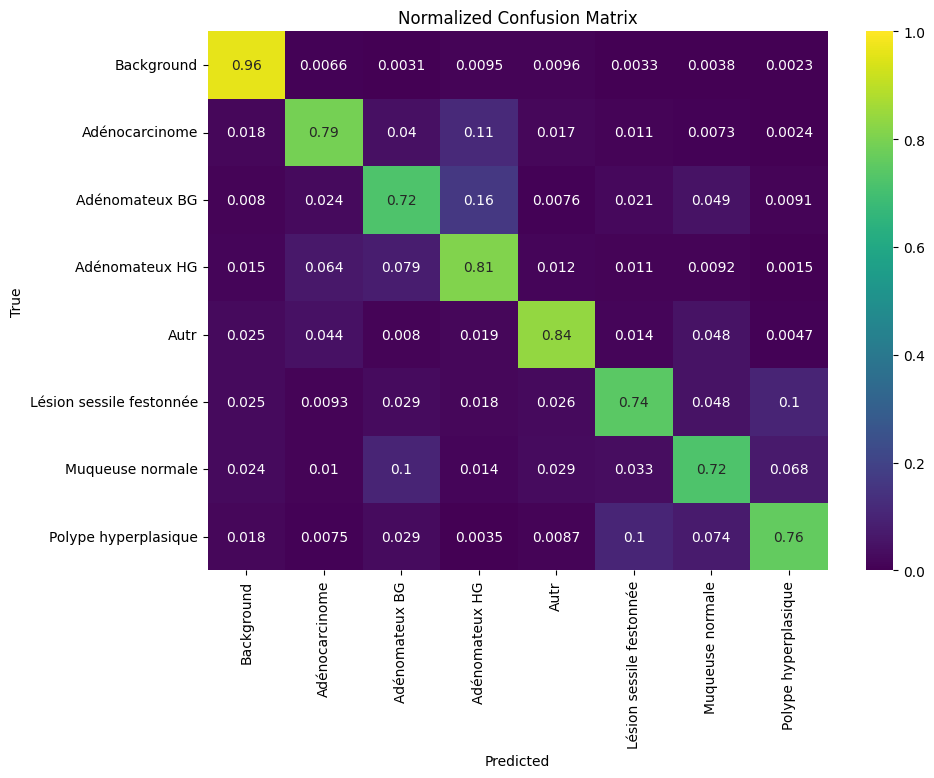

array([[5.17017140e+08, 3.53123800e+06, 1.68764100e+06, 5.08361800e+06,
        5.14658300e+06, 1.79260500e+06, 2.01696800e+06, 1.24215700e+06],
       [3.68689200e+06, 1.57320969e+08, 8.06695100e+06, 2.26467920e+07,
        3.42741400e+06, 2.20107200e+06, 1.46269000e+06, 4.83532000e+05],
       [2.86009000e+06, 8.59690200e+06, 2.58283290e+08, 5.74074060e+07,
        2.71790400e+06, 7.36392700e+06, 1.76761760e+07, 3.27100700e+06],
       [1.09873610e+07, 4.65375860e+07, 5.70469770e+07, 5.87325531e+08,
        8.84465800e+06, 7.81798300e+06, 6.66609700e+06, 1.10260900e+06],
       [5.17269400e+06, 9.17609800e+06, 1.66877900e+06, 3.88229200e+06,
        1.75011196e+08, 3.00746100e+06, 1.00882120e+07, 9.83941000e+05],
       [4.17895600e+06, 1.55842900e+06, 4.82063200e+06, 3.01625900e+06,
        4.32668900e+06, 1.24853549e+08, 8.02002400e+06, 1.70327780e+07],
       [3.75850700e+06, 1.62815000e+06, 1.59489900e+07, 2.16619400e+06,
        4.63458100e+06, 5.15348600e+06, 1.14055217e+08, 1.

In [3]:
path = r"C:\Users\akoukash\Work_lab\AID\training\logs\AID3"
weight_path = r"best_f1.pt"
get_confmat(weight_path)

In [51]:
# Load model
from model import HalfDualDec

weight_path = r"C:\Users\akoukash\Work_lab\AID\training\logs\AID3\best_f1.pt"

model = HalfDualDec()
model.load_state_dict(torch.load(weight_path))

model = nn.Sequential(model, nn.Sigmoid())
model = model.cuda()
model.eval()


model_soft = HalfDualDec()
model_soft.load_state_dict(torch.load(weight_path))
model_soft = nn.Sequential(model_soft, nn.Softmax(dim=1))
model_soft = model_soft.cuda()
model_soft.eval()

Sequential(
  (0): HalfDualDec(
    (encoder): DenseNetEncoder(
      (features): Sequential(
        (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu0): ReLU(inplace=True)
        (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (denseblock1): _DenseBlock(
          (denselayer1): _DenseLayer(
            (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu1): ReLU(inplace=True)
            (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu2): ReLU(inplace=True)
            (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          )
          (denselayer2): _DenseLay

In [28]:
from PIL import Image


def mask_to_color_image(mask):
    class_map = {
        0: (0, 0, 0),
        1: (255, 0, 0),
        2: (251, 220, 0),
        3: (255, 128, 0),
        4: (0, 0, 255),
        5: (255, 0, 255),
        6: (0, 255, 0),
        7: (0, 255, 255),
        8: (128, 128, 128),
    }

    mask_np = np.array(mask)
    color_mask = np.zeros(
        (mask_np.shape[0], mask_np.shape[1], 3), dtype=np.uint8)
    for value, color in class_map.items():
        color_mask[mask_np == value] = color
    return Image.fromarray(color_mask)

In [29]:
list_classes = [
    "Background",
    "Adénocarcinome",
    "Adénomateux BG",



    "Adénomateux HG",
    "Autr",



    "Lésion sessile festonnée",



    "Muqueuse normale",



    "Polype hyperplasique",



    "Tissue Background",
]

class_map = {
    "Background": (0, 0, 0),
    "Adénocarcinome": (255, 0, 0),
    "Adénomateux BG": (255, 255, 0),
    "Adénomateux HG": (230, 108, 0),
    "Autr": (0, 0, 255),
    "Lésion sessile festonnée": (255, 0, 255),
    "Muqueuse normale": (0, 255, 0),
    "Polype hyperplasique": (0, 255, 255),
    "Tissue Background": (128, 128, 128)

}

c:\users\akoukash\work_lab\tribun_patchio\tribun_patchio\openslide_web_wrapper.py:127: UserWarning: local image has no resolution metadata. You can set it by providing the 'resolution_lvl0' argument.
  warnings.warn(
c:\users\akoukash\work_lab\tribun_patchio\tribun_patchio\datasets.py:275: UserWarning: ImageSlide, Openslide or numpy array objects are not compatible with asynchronous loading.
  warnings.warn("ImageSlide, Openslide or numpy array objects are not"
100%|██████████| 12/12 [00:01<00:00,  7.42it/s]


Text(0.5, 0.98, 'C:\\Users\\akoukash\\Work_lab\\AID\\data\\ROIs_correct\\IGR_JY_Scoazec_c\\23h01800-05ahghes\\23h01800-05ahghes_140697_38669_slide.png')

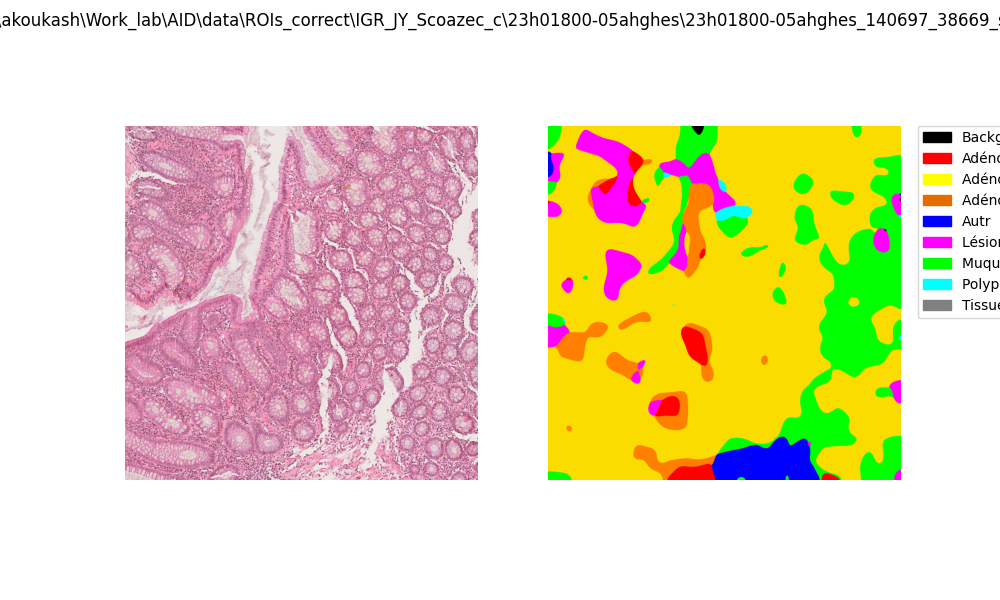

In [53]:
from scipy.ndimage import gaussian_filter
path_im = r"C:\Users\akoukash\Work_lab\AID\data\ROIs_correct\IGR_JY_Scoazec_c\23h01800-05ahghes\23h01800-05ahghes_140697_38669_slide.png"
slide = openslide_web_wrapper.open_slide(path_im, magnification_lvl0=10)



roi_slide = slide.roi_slide(
    roi=[0, 0] + list(slide.dimensions), magnification=10)



patch_arr = np.array(



    roi_slide.read_region((0, 0), 0, roi_slide.dimensions).convert("RGB")
)



foreground = None



ps = 256



wf = patch_operations.window_function_hahn(ps, ps)



probs = patch_operations.wsi2probs(
    slide=patch_arr,



    patch_size=ps,



    patch_overlap=32,



    include_border_patches=True,



    batch_size=16,
    model=model,



    mask=foreground,



    mask_patch_inclusion_threshold=0.1,
)



probsim = patch_operations.probs2wsi(



    slide_dim=patch_arr.shape[:2],



    patch_size=ps,


    generator_locs_probs=probs,



    window_function=wf,



)

n_classes = probsim.shape[2]

# Initialisiere ein Array für die geglätteten Wahrscheinlichkeiten
smoothed_probsim = np.zeros_like(probsim)

# Wende den Gaußschen Filter auf jede Klasse an
for i in range(n_classes):
    smoothed_probsim[:, :, i] = gaussian_filter(probsim[:, :, i], sigma=50)

# Anschließend wende np.argmax auf das geglättete Array an, um die finale Maske zu erhalten
mask = np.argmax(smoothed_probsim, axis=2)


# mask = np.argmax(probsim, axis=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].imshow(patch_arr)
axs[0].axis('off')
colored_mask = mask_to_color_image(mask)
axs[1].imshow(colored_mask)
axs[1].axis('off')
patches = [mpatches.Patch(color=np.array(color) / 255.0, label=class_name)
           for class_name, color in class_map.items()]
plt.legend(handles=patches, bbox_to_anchor=(
    1.05, 1), loc=2, borderaxespad=0.)
fig.suptitle(path_im)



# fig, axs = plt.subplots(2, 5, figsize=(10, 6))



# axs[0, 0].imshow(patch_arr)



# axs[0, 0].axis("off")



# for i in range(9):



#     mask = probsim[..., i]



#     # axs[1].imshow(mask, cmap=cmap, vmin=0, vmax=6, interpolation="nearest")



#     axs[(i + 1) // 5, (i + 1) % 5].imshow(mask, vmin=0, vmax=1)



#     axs[(i + 1) // 5, (i + 1) % 5].axis("off")



#     axs[(i + 1) // 5, (i + 1) % 5].set_title(list_classes[i])



# fig.suptitle(path_im)

100%|██████████| 12/12 [00:01<00:00,  7.12it/s]


Text(0.5, 0.98, 'C:\\Users\\akoukash\\Work_lab\\AID\\data\\ROIs_correct\\IGR_JY_Scoazec_c\\23h01800-05ahghes\\23h01800-05ahghes_140697_38669_slide.png')

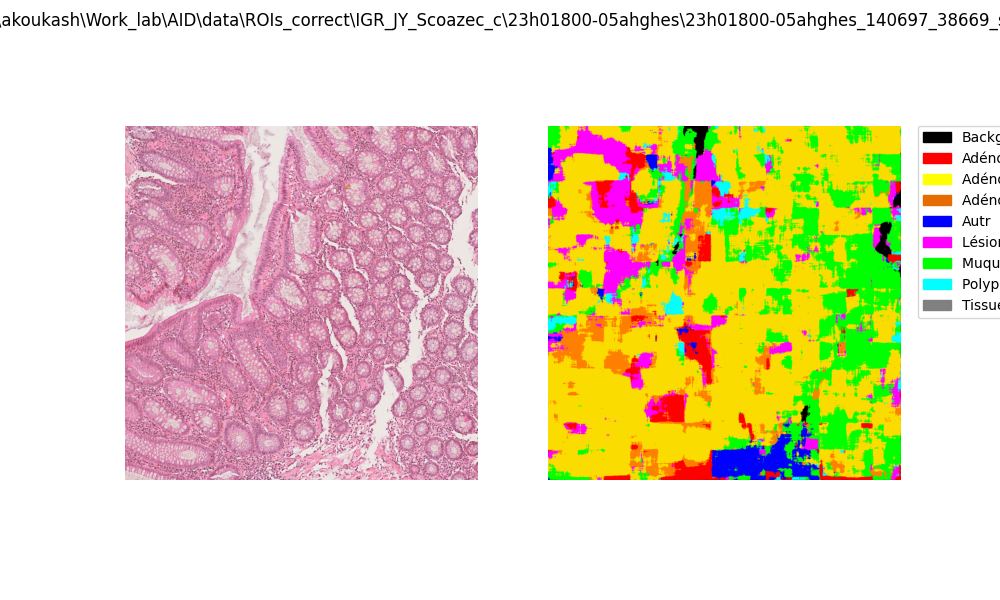

In [46]:
path_im = r"C:\Users\akoukash\Work_lab\AID\data\ROIs_correct\IGR_JY_Scoazec_c\23h01800-05ahghes\23h01800-05ahghes_140697_38669_slide.png"
slide = openslide_web_wrapper.open_slide(path_im, magnification_lvl0=10)
roi_slide = slide.roi_slide(
    roi=[0, 0] + list(slide.dimensions), magnification=10)
patch_arr = np.array(
    roi_slide.read_region((0, 0), 0, roi_slide.dimensions).convert("RGB")
)
foreground = None

ps = 256
wf = patch_operations.window_function_hahn(ps, ps)

probs = patch_operations.wsi2probs(
    slide=patch_arr,
    patch_size=ps,
    patch_overlap=32,
    include_border_patches=True,
    batch_size=16,
    model=model,
    mask=foreground,
    mask_patch_inclusion_threshold=0.1,
)
probsim = patch_operations.probs2wsi(
    slide_dim=patch_arr.shape[:2],
    patch_size=ps,
    generator_locs_probs=probs,
    window_function=wf,
)

mask = np.argmax(probsim, axis=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].imshow(patch_arr)
axs[0].axis("off")
colored_mask = mask_to_color_image(mask)
axs[1].imshow(colored_mask)
axs[1].axis("off")
patches = [
    mpatches.Patch(color=np.array(color) / 255.0, label=class_name)
    for class_name, color in class_map.items()
]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
fig.suptitle(path_im)


# fig, axs = plt.subplots(2, 5, figsize=(10, 6))
# axs[0, 0].imshow(patch_arr)
# axs[0, 0].axis("off")
# for i in range(9):
#     mask = probsim[..., i]
#     # axs[1].imshow(mask, cmap=cmap, vmin=0, vmax=6, interpolation="nearest")
#     axs[(i + 1) // 5, (i + 1) % 5].imshow(mask, vmin=0, vmax=1)
#     axs[(i + 1) // 5, (i + 1) % 5].axis("off")
#     axs[(i + 1) // 5, (i + 1) % 5].set_title(list_classes[i])
# fig.suptitle(path_im)

In [ ]:
# Load model
from model import HalfDualDec

weight_path = r"C:\Users\akoukash\Work_lab\AID\training\logs\AID3\best_f1.pt"

model = HalfDualDec()
model.load_state_dict(torch.load(weight_path))
model = nn.Sequential(model, nn.Sigmoid())
model = model.cuda()
model.eval()


# model_soft = HalfDualDec()
# model_soft.load_state_dict(torch.load(weight_path))
# model_soft = nn.Sequential(model_soft, nn.Softmax(dim=1))
# model_soft = model_soft.cuda()
# model_soft.eval()
def mask_to_color_image(mask):
    class_map = {
        0: (0, 0, 0),
        1: (255, 0, 0),
        2: (251, 220, 0),
        3: (255, 128, 0),
        4: (0, 0, 255),
        5: (255, 0, 255),
        6: (0, 255, 0),
        7: (0, 255, 255),
        8: (128, 128, 128),
    }

    mask_np = np.array(mask)
    color_mask = np.zeros(
        (mask_np.shape[0], mask_np.shape[1], 3), dtype=np.uint8)
    for value, color in class_map.items():
        color_mask[mask_np == value] = color
    return Image.fromarray(color_mask)


list_classes = [
    "Background",
    "Adénocarcinome",
    "Adénomateux BG",
    "Adénomateux HG",
    "Autr",
    "Lésion sessile festonnée",
    "Muqueuse normale",
    "Polype hyperplasique",
    "Tissue Background",
]

class_map = {
    "Background": (0, 0, 0),
    "Adénocarcinome": (255, 0, 0),
    "Adénomateux BG": (255, 255, 0),
    "Adénomateux HG": (230, 108, 0),
    "Autr": (0, 0, 255),
    "Lésion sessile festonnée": (255, 0, 255),
    "Muqueuse normale": (0, 255, 0),
    "Polype hyperplasique": (0, 255, 255),
    "Tissue Background": (128, 128, 128),
}


def apply_mapping_to_mask_grayscale(mask):
    mapping = {
        0: 0,  # Background OK
        18: 6,  # Muqueuse normale OK
        36: 6,  # Muqueuse normale OK
        54: 7,  # Polype hyperplasique
        72: 7,  # Polype hyperplasique
        91: 5,  # Lésion sessile festonnée
        109: 5,  # Lésion sessile festonnée
        127: 2,  # Adénomateux BG
        145: 2,  # Adénomateux BG
        163: 3,  # Adénomateux HG
        182: 3,  # Adénomateux HG
        200: 1,  # Adénocarcinome
        218: 1,  # Adénocarcinome
        236: 4,  # Autre
        255: 4,  # Autre
        10: 8,  # Tissue without class
    }

    mask[:] = np.vectorize(mapping.get)(mask)

    return mask


def make_pred(slide_name, mask_path, wsi_path):

    slide = openslide_web_wrapper.open_slide(wsi_path, magnification_lvl0=10)
    roi_slide = slide.roi_slide(
        roi=[0, 0] + list(slide.dimensions), magnification=10)
    patch_arr = np.array(
        roi_slide.read_region((0, 0), 0, roi_slide.dimensions).convert("RGB")
    )
    foreground = None
    from scipy.ndimage import gaussian_filter

    ps = 256
    wf = patch_operations.window_function_hahn(ps, ps)

    probs = patch_operations.wsi2probs(
        slide=patch_arr,
        patch_size=ps,
        patch_overlap=32,
        include_border_patches=True,
        batch_size=16,
        model=model,
        mask=foreground,
        mask_patch_inclusion_threshold=0.1,
    )
    probsim = patch_operations.probs2wsi(
        slide_dim=patch_arr.shape[:2],
        patch_size=ps,
        generator_locs_probs=probs,
        window_function=wf,
    )

    mask = np.argmax(probsim, axis=2)
    mask = mask_to_color_image(mask)

    n_classes = probsim.shape[2]
    smoothed_probsim = np.zeros_like(probsim)
    for i in range(n_classes):
        smoothed_probsim[:, :, i] = gaussian_filter(probsim[:, :, i], sigma=50)
    mask_gaus = np.argmax(smoothed_probsim, axis=2)
    colored_predicted_mask = mask_to_color_image(mask_gaus)

    true_mask = np.array(Image.open(mask_path))

    fig, axs = plt.subplots(1, 4, figsize=(15, 5))

    axs[0].imshow(patch_arr)
    axs[0].set_title("Original")
    axs[0].axis("off")
    axs[1].imshow(true_mask)  # Hier verwenden wir true_mask_arr direkt
    axs[1].set_title("True Mask")
    axs[1].axis("off")

    axs[2].imshow(mask)
    axs[2].set_title("Predicted Mask")
    axs[2].axis("off")

    # Zeige die wahre Maske
    # Hier verwenden wir true_mask_arr direkt
    axs[3].imshow(colored_predicted_mask)
    axs[3].set_title("Predicted Mask gaussian")
    axs[3].axis("off")

    # fig, axs = plt.subplots(1, 2, figsize=(10, 6))
    # axs[0].imshow(patch_arr)
    # axs[0].axis('off')
    # colored_mask = mask_to_color_image(mask)
    # axs[1].imshow(colored_mask)
    # axs[1].axis('off')
    patches = [
        mpatches.Patch(color=np.array(color) / 255.0, label=class_name)
        for class_name, color in class_map.items()
    ]
    plt.legend(handles=patches, bbox_to_anchor=(
        1.05, 1), loc=2, borderaxespad=0.0)
    fig.suptitle(slide_name)

    save_path = os.path.join(SAVE_FOLDER, f"{slide_name}.png")
    plt.savefig(save_path, bbox_inches="tight")
    plt.close(fig)


SAVE_FOLDER = r"C:\Users\akoukash\Work_lab\AID\training\logs\AID3\preds\batch_2"

df = pd.read_csv(
    r"C:\Users\akoukash\Work_lab\AID\training\dataset\eval_batch_2.csv")

names = df["slide_name"].tolist()
slides_path = df["slide_path"].tolist()
masks_path = df["class_path"].tolist()

for name, slide, mask in zip(names, slides_path, masks_path):
    make_pred(name, mask, slide)

c:\users\akoukash\work_lab\tribun_patchio\tribun_patchio\openslide_web_wrapper.py:127: UserWarning: local image has no resolution metadata. You can set it by providing the 'resolution_lvl0' argument.
  warnings.warn(
c:\users\akoukash\work_lab\tribun_patchio\tribun_patchio\datasets.py:275: UserWarning: ImageSlide, Openslide or numpy array objects are not compatible with asynchronous loading.
  warnings.warn("ImageSlide, Openslide or numpy array objects are not"
  0%|          | 0/450 [00:00<?, ?it/s]

MemoryError: Unable to allocate 2.66 GiB for an array with shape (15938, 22405, 1) and data type float64

No such comm: c34dbd9b3df54d63b6195a0bbb7e5a77
No such comm: 5f1d05a889c94282969dbf776f85b5e3
No such comm: 5f1d05a889c94282969dbf776f85b5e3
No such comm: 5f1d05a889c94282969dbf776f85b5e3
No such comm: 5f1d05a889c94282969dbf776f85b5e3
No such comm: 5f1d05a889c94282969dbf776f85b5e3
No such comm: 5f1d05a889c94282969dbf776f85b5e3
No such comm: 5f1d05a889c94282969dbf776f85b5e3
No such comm: 5f1d05a889c94282969dbf776f85b5e3
No such comm: 5f1d05a889c94282969dbf776f85b5e3
No such comm: 5f1d05a889c94282969dbf776f85b5e3
No such comm: 5f1d05a889c94282969dbf776f85b5e3
No such comm: e15d94f730f64e59bfa28fc0a90fa510
No such comm: e15d94f730f64e59bfa28fc0a90fa510
No such comm: e15d94f730f64e59bfa28fc0a90fa510
No such comm: e15d94f730f64e59bfa28fc0a90fa510
No such comm: e15d94f730f64e59bfa28fc0a90fa510
No such comm: e15d94f730f64e59bfa28fc0a90fa510
No such comm: e15d94f730f64e59bfa28fc0a90fa510
No such comm: e15d94f730f64e59bfa28fc0a90fa510
No such comm: e15d94f730f64e59bfa28fc0a90fa510
No such comm:

NameError: name 'class_map' is not defined

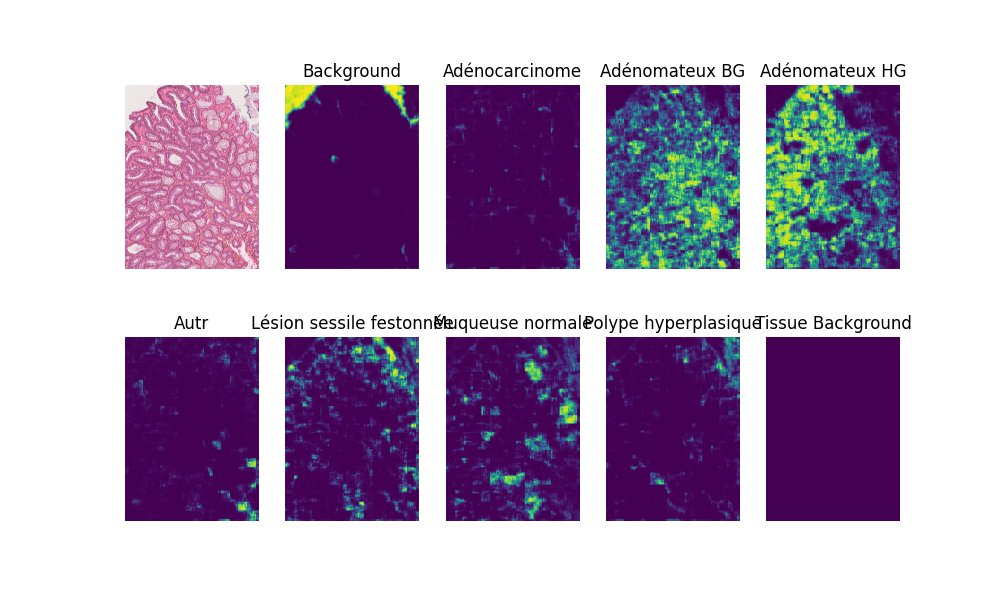

In [14]:
# mask = np.argmax(probsim, axis=2)
mask = probsim[..., 2]

fig, axs = plt.subplots(2, 5, figsize=(10, 6))
axs[0, 0].imshow(patch_arr)
axs[0, 0].axis("off")
for i in range(9):
    mask = probsim[..., i]
    # axs[1].imshow(mask, cmap=cmap, vmin=0, vmax=6, interpolation="nearest")
    axs[(i + 1) // 5, (i + 1) % 5].imshow(mask, vmin=0, vmax=1)
    axs[(i + 1) // 5, (i + 1) % 5].axis("off")
    axs[(i + 1) // 5, (i + 1) % 5].set_title(list_classes[i])

patches = [
    mpatches.Patch(color=np.array(color) / 255.0, label=class_name)
    for class_name, color in class_map.items()
]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
fig.suptitle(path_im)

In [19]:
max_im = probsim[..., 2] > probsim[..., 3]
plt.imshow(max_im)

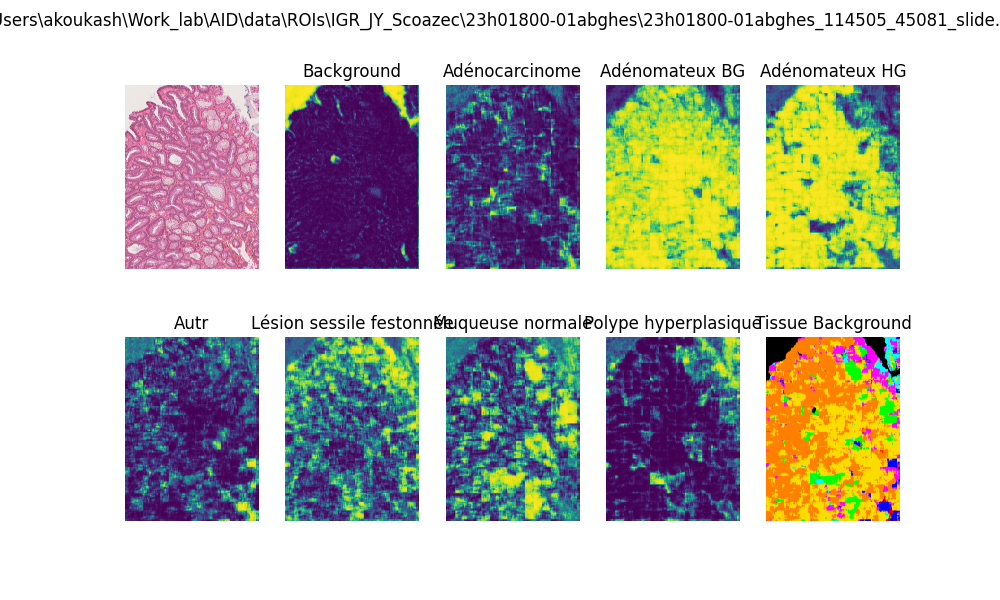

In [20]:
%matplotlib widget
mask = np.argmax(probsim, axis=2)
colored_mask = mask_to_color_image(mask)


# plt.imshow(mask)
plt.imshow(colored_mask)
plt.show()